In [1]:
# Peak amplitude normalization
import pandas as pd
import librosa
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from pydub import AudioSegment
import sounddevice as sd
import time

from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

C:\Users\holovachm\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\holovachm\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


V tejto časti importujeme potrebné knižnice, ako sú Pandas, NumPy, Librosa, Matplotlib a Seaborn. Potom nastavíme tému a farebnú paletu pre grafické zobrazenia.

In [2]:
x, Fs = librosa.load("../git/sounds/AcGtr.wav")

rhodB = -1
rho = 10**(rhodB/20)

Najprv sa nastaví konštanta "rhodB" na hodnotu -0,1, ktorá predstavuje požadovanú špičkovú úroveň amplitúdy v decibeloch (dB) po normalizácii.

Potom sa vypočíta normalizačný faktor "rho" podľa vzorca rho = 10**(rhodB/20), kde "20" predstavuje referenčnú hodnotu 1 pre pomer amplitúdy v dB.

In [3]:
xPeak = max(abs(x))
yPeakNorm = (rho/xPeak) * x

Potom sa pomocou funkcií max() a abs() vypočíta maximálna absolútna hodnota zvukových údajov a priradí sa premennej "xPeak". Táto hodnota predstavuje maximálnu hodnotu amplitúdy v pôvodných zvukových údajoch.
 Nakoniec sa normalizované zvukové údaje "yPeakNorm" vypočítajú pomocou vzorca (rho/xPeak) * x, kde "x" sú pôvodné zvukové údaje. Tento vzorec škáluje zvukové údaje normalizačným faktorom "rho" a pomerom maximálnej absolútnej hodnoty "xPeak", čím sa získajú normalizované zvukové údaje s požadovanou úrovňou špičkovej amplitúdy "rhodB".

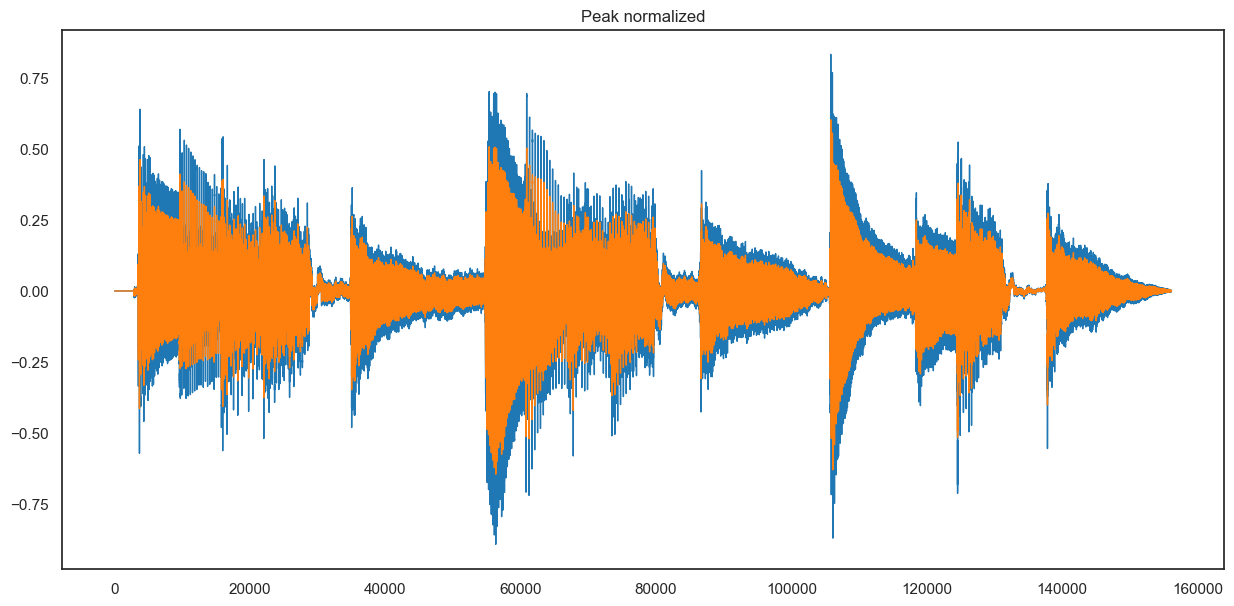

In [7]:
pd.Series(yPeakNorm).plot(figsize=(15,7),
                  lw=1,
                  title='Peak normalized',
                  color=color_pal[0])
pd.Series(x).plot(figsize=(15,7),
                  lw=1,
                  title='',
                  color=color_pal[1])
plt.show()

Tu vidíme grafy závislosti amplitúdy od času pre pôvodný zvuk (premenná x) a normalizovaný zvuk (premenná yPeakNorm).

Každý graf je reprezentovaný priamkou s časom vyneseným na horizontálnej osi a amplitúdou zvuku zobrazenou na vertikálnej osi.

Graf pôvodného zvuku x je vykreslený s hodnotami amplitúdy, ktoré neboli normalizované, takže môže mať hodnoty amplitúdy v ľubovoľnom rozsahu.

Graf normalizovaného zvuku yPeakNorm je vykreslený s hodnotami amplitúdy, ktoré boli normalizované, takže všetky hodnoty amplitúdy sú v grafe zobrazené v rozsahu od -1 do 1, ak je konštanta rhodB nastavená na hodnotu 1.

Vo všeobecnosti grafy zobrazujú, ako sa zmenila úroveň amplitúdy zvuku po normalizácii.

In [5]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/AcGtr.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(x, Fs)
time.sleep(seconds_duration + 1)
sd.play(yPeakNorm, Fs)